## Final Project Submission

Please fill out:
* Student name: Cassidy Exum
* Student pace: self paced
* Scheduled project review date/time: Undetermined
* Instructor name: Morgan Jones
* Blog post URL: https://exumexaminesdata.blogspot.com/2022/08/creating-fantasy-sports-app-for-pll.html


# Determining the impact of different features on house price

We are going to use linear regression and other statistical tools to determine what features affect the sale price of a house, and create models that can predict the sale price after learning from those freatures.

### Stakeholder: Blackrock
Blackrock is an American investment managment company that has recently been buying up a ton of real estate. They have tasked us with helping them determine the key features of a houses sale price and generating models to predict prices for them.

# What questions are we going to solve?

## Three possible questions:

### Bedrooms and Bathrooms vs price
The most common way to search for houses/apartments is to start with the number of bedrooms or bathrooms you need and to limit everything from there. So this is probably a good starting point.

### How much does location impact price? Can we create a model that would predict price based off of location?
To do this I'm going to use Waterfront and View to create a regression model

### How much does size impact price?
There are a lot of columns that relate to the size of the house. 

size_cols = [sqft_lot15, sqft_living15, sqft_basement, sqft_above, sqft_lot, sqft_living, bathrooms, bedrooms]


# 1: Imports and Data Cleaning

Lets start by importing the required packages and inspecting the data

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/kc_house_data.csv')

In [4]:
# Next few blocks will be some data info
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# 3 columns arent the same length as everything else
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Are these columns useful? What are they?
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `yr_renovated` - Year when house was renovated

In [10]:
# Check counts
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

Waterfront is binary, so NA values we can assume are "NO"

In [12]:
# fill NAN values
data['waterfront'].fillna('NO', inplace=True)

In [13]:
# Check counts
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

We can also assume that NAN values in View would just be None

In [14]:
# fill NAN values
data['view'].fillna('NONE', inplace=True)

Last column that has issues, 'year renovated'

In [15]:
# Check counts
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Ok, good to note that 0.0 is a placeholder. It probably indicates that the house was never renovated and NAN values represent that we do not know if it was ever renovated. I don't want to fill NA with anything here, so we probably won't use this column. Lets just drop it.

In [16]:
# drop yr_renovated
data.drop('yr_renovated', axis=1, inplace=True)

Lets check the data again and ensure everything worked

In [17]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Perfect. The last column that i was to check right at the beginning is the price column, as that is our target and we can't have any weird placeholder values

In [18]:
#check counts
data['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

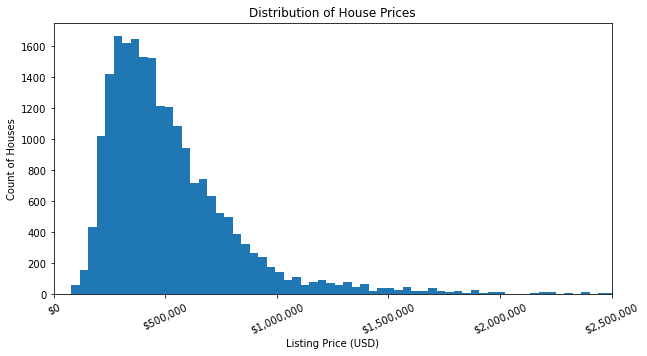

In [42]:
# Create a graph of sale price

import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data['price'], bins=200)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of House Prices");
plt.xlim(0, 2500000)

fmt = '${x:,.0f}'
plt.ticklabel_format(style='plain')
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

plt.show();

Looks good. Now to solve our questions

# What questions are we going to solve?

## Three possible questions:

### Bedrooms and Bathrooms vs price
The most common way to search for houses/apartments is to start with the number of bedrooms or bathrooms you need and to limit everything from there. So this is probably a good starting point.

### How much does location impact price? Can we create a model that would predict price based off of location?
To do this I'm going to use Waterfront and View to create a regression model

### How much does size impact price?
There are a lot of columns that relate to the size of the house. 

size_cols = [sqft_lot15, sqft_living15, sqft_basement, sqft_above, sqft_lot, sqft_living, bathrooms, bedrooms]


# 2: Answering our first question.

## Bedrooms and Bathrooms vs Price

Lets set up a train test split for our data

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

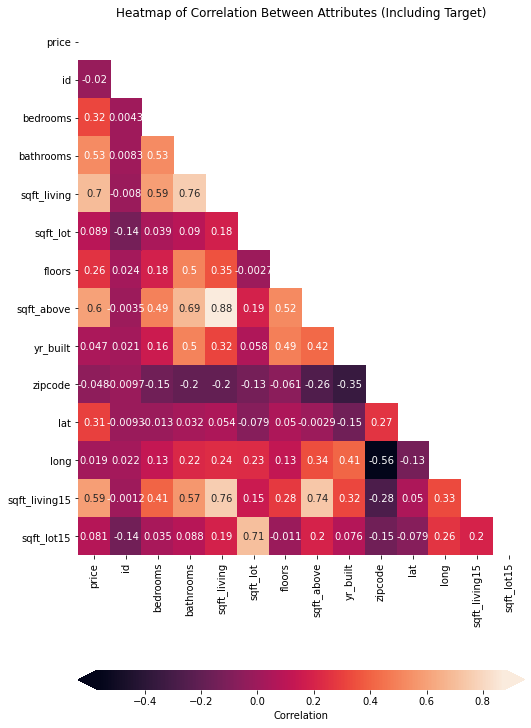

In [59]:
#Create a correlation heatmap

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 14))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .15, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the heatmap. It looks like Bedrooms, Bathrooms, sqft_living, sqft_above, and sqft_living15 are the best predictors. If we wanted to make a full model that uses all of these to predict, it would be the most robust model.

The first model we will create is just a model using Bedroom and Bathrooms because based on user feedback and interaction, those a common features that people sort by

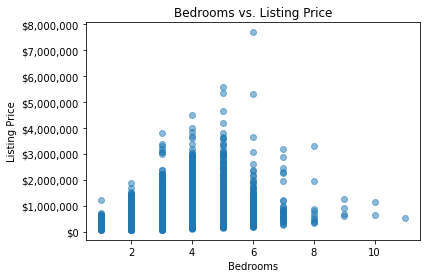

In [69]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(X_train['bedrooms'], y_train, alpha=0.5)
plt.ticklabel_format(style='plain')
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.set_xlabel('Bedrooms')
ax.set_ylabel("Listing Price")
ax.set_title("Bedrooms vs. Listing Price");

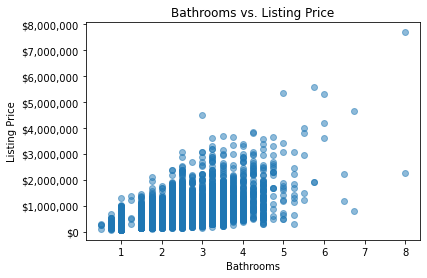

In [68]:
fig, ax = plt.subplots()

ax.scatter(X_train['bathrooms'], y_train, alpha=0.5)
plt.ticklabel_format(style='plain')
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.set_xlabel('Bathrooms')
ax.set_ylabel("Listing Price")
ax.set_title("Bathrooms vs. Listing Price");